## Building a Neural Network Classifier

Following the example in the demos you have seen, clear the keras session. Then, create a neural network `model` with:

-   `nh=256` hidden units in a single dense hidden layer
-   `sigmoid` activation at hidden units
-   select the input and output shapes, and output activation, according to the problem requirements. Use the variables you defined earlier (`n_tr`, `n_ts`, `n_feat`, `n_class`) as applicable, rather than hard-coding numbers.

Print the model summary.

``` python
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import time
%matplotlib inline
```

## Loading Data

Here, we’ll load the processed data defined in the previous notebook

``` python
Xtr_scale = np.load('instrument_dataset/uiowa_std_scale_train_data.npy')
ytr = np.load('instrument_dataset/uiowa_permuted_train_labels.npy')
Xts_scale = np.load('instrument_dataset/uiowa_std_scale_test_data.npy')
yts = np.load('instrument_dataset/uiowa_test_labels.npy')
```

``` python
# TODO -  get basic details of the data
# compute these values from the data, don't hard-code them
n_tr    = Xtr_scale.shape[0]
n_ts    = Xts_scale.shape[0]
n_feat  = Xtr_scale.shape[1]
n_class = len(np.unique(ytr))
```

``` python
# now print those details
print("Num training= %d" % n_tr)
print("Num test=     %d" % n_ts)
print("Num features= %d" % n_feat)
print("Num classes=  %d" % n_class)
```

    Num training= 66247
    Num test=     14904
    Num features= 120
    Num classes=  10

## Building the classification model

``` python
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
import tensorflow.keras.backend as K
```

``` python
# TODO - construct the model
nh = 256
model = Sequential()
model.add(Input(n_feat,))
model.add(Dense(nh, activation = 'sigmoid'))
model.add(Dense(n_class, activation = 'softmax'))
```

``` python
# show the model summary
model.summary()
```

    Model: "sequential_5"
    _________________________________________________________________
     Layer (type)                Output Shape              Param #   
    =================================================================
     dense_10 (Dense)            (None, 256)               30976     
                                                                     
     dense_11 (Dense)            (None, 10)                2570      
                                                                     
    =================================================================
    Total params: 33546 (131.04 KB)
    Trainable params: 33546 (131.04 KB)
    Non-trainable params: 0 (0.00 Byte)
    _________________________________________________________________

``` python
# you can also visualize the model with
tf.keras.utils.plot_model(model, show_shapes=True)
```

<figure>
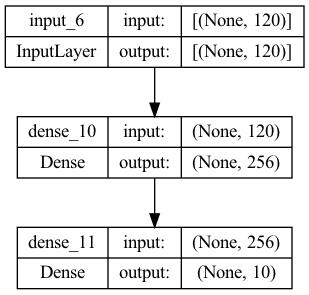
<figcaption aria-hidden="true">png</figcaption>
</figure>

Create an optimizer and compile the model. Select the appropriate loss function for this multi-class classification problem, and use an accuracy metric. For the optimizer, use the Adam optimizer with a learning rate of 0.001

``` python
# TODO - create optimizer and compile the model
opt = optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

model.compile(optimizer = opt, loss = loss_fn, metrics = ['accuracy'])
```

    WARNING:absl:At this time, the v2.11+ optimizer `tf.keras.optimizers.Adam` runs slowly on M1/M2 Macs, please use the legacy Keras optimizer instead, located at `tf.keras.optimizers.legacy.Adam`.

Fit the model for 10 epochs using the scaled data for both training and validation, and save the training history in \`hist.

Use the `validation_data` option to pass the *test* data. (This is OK because we are not going to use this data as part of the training process, such as for early stopping - we’re just going to compute the accuracy on the data so that we can see how training and test loss changes as the model is trained.)

Use a batch size of 128. Your final accuracy should be greater than 99%.

``` python
# TODO - fit model and save training history
n_epochs = 10

hist = model.fit(Xtr_scale,ytr, batch_size = 128, epochs = 10, validation_data=(Xts_scale, yts))
```

    Epoch 1/10
     22/518 [>.............................] - ETA: 2s - loss: 1.5224 - accuracy: 0.5281

    2024-03-31 22:33:30.940169: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


    518/518 [==============================] - 3s 6ms/step - loss: 0.3909 - accuracy: 0.8948 - val_loss: 0.2040 - val_accuracy: 0.9483
    Epoch 2/10
    518/518 [==============================] - 3s 6ms/step - loss: 0.1149 - accuracy: 0.9725 - val_loss: 0.1224 - val_accuracy: 0.9609
    Epoch 3/10
    518/518 [==============================] - 3s 5ms/step - loss: 0.0688 - accuracy: 0.9840 - val_loss: 0.0727 - val_accuracy: 0.9822
    Epoch 4/10
    518/518 [==============================] - 3s 6ms/step - loss: 0.0486 - accuracy: 0.9879 - val_loss: 0.0616 - val_accuracy: 0.9831
    Epoch 5/10
    518/518 [==============================] - 3s 6ms/step - loss: 0.0373 - accuracy: 0.9904 - val_loss: 0.0440 - val_accuracy: 0.9893
    Epoch 6/10
    518/518 [==============================] - 3s 5ms/step - loss: 0.0300 - accuracy: 0.9925 - val_loss: 0.0447 - val_accuracy: 0.9865
    Epoch 7/10
    518/518 [==============================] - 3s 6ms/step - loss: 0.0246 - accuracy: 0.9938 - val_loss: 0.0410 - val_accuracy: 0.9877
    Epoch 8/10
    518/518 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9947 - val_loss: 0.0319 - val_accuracy: 0.9905
    Epoch 9/10
    518/518 [==============================] - 3s 5ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.0258 - val_accuracy: 0.9931
    Epoch 10/10
    518/518 [==============================] - 3s 5ms/step - loss: 0.0153 - accuracy: 0.9960 - val_loss: 0.0284 - val_accuracy: 0.9919

Plot the training and validation accuracy saved in `hist.history` dictionary, on the same plot. This gives one accuracy value per epoch. You should see that the validation accuracy saturates around 99%. After that it may “bounce around” a little due to the noise in the stochastic mini-batch gradient descent.

Make sure to label each axis, and each series (training vs. validation/test).

``` python
# TODO - plot the training and validation accuracy in one plot
plt.figure(figsize=(5,3))

train_acc = hist.history['accuracy'];
val_acc = hist.history['val_accuracy'];

nepochs = len(train_acc);
plt1 = sns.lineplot(x=np.arange(1,nepochs+1), y=train_acc, label='Training accuracy');
plt2 = sns.lineplot(x=np.arange(1,nepochs+1), y=val_acc, label='Validation accuracy');
xlab = plt.xlabel('Epoch');
ylab = plt.ylabel('Accuracy')
```

<figure>
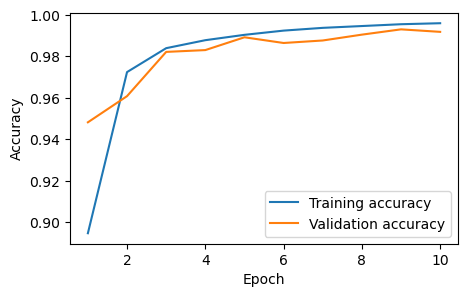
<figcaption aria-hidden="true">png</figcaption>
</figure>

Plot the training and validation loss values saved in the `hist.history` dictionary, on the same plot. You should see that the training loss is steadily decreasing. Use the [`semilogy` plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogy.html) so that the y-axis is log scale.

Make sure to label each axis, and each series (training vs. validation/test).

``` python
# TODO - plot the training and validation loss in one plot
plt.figure(figsize=(5,3))

train_loss = hist.history['loss'];
val_loss = hist.history['val_loss'];

nepochs = len(train_acc);
plt1 = plt.semilogy(np.arange(1,nepochs+1), train_loss, label='Training loss');
plt2 = plt.semilogy(np.arange(1,nepochs+1), val_loss, label='Validation loss');
xlab = plt.xlabel('Epoch')
ylab = plt.ylabel('Loss')
lgnd = plt.legend()
```

<figure>
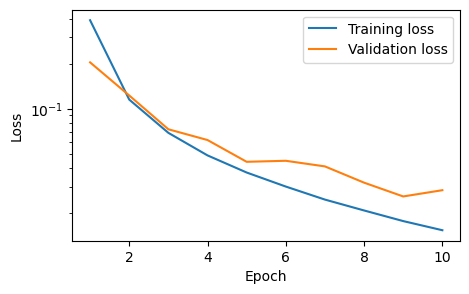
<figcaption aria-hidden="true">png</figcaption>
</figure>